In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv('spotify-2023.csv', sep=',', encoding='ISO-8859-1')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [2]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [3]:
print(data.loc[574,:])
data = data.drop(574)
data.reset_index(drop = True, inplace = True)

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

In [4]:
data['streams'] = data['streams'].apply(lambda x: int(x))
streams = data['streams']
playlists = data['in_spotify_playlists']

In [5]:
q1 = playlists.quantile(q = 0.75)
q2 = streams.quantile(q = 0.75)

print('Third quartile(playlists):',q1)
print('Third quartile(streams):',q2)
print('Max in playlists:', max(playlists))
print('Max in playlists:', max(streams))

Third quartile(playlists): 5573.75
Third quartile(streams): 673869022.0
Max in playlists: 52898
Max in playlists: 3703895074


In [6]:
streams = data['streams'].apply(lambda x: (x * data.shape[0]) /sum(data['streams']))
streams

0      0.274988
1      0.260079
2      0.272308
3      1.557640
4      0.589796
         ...   
947    0.177916
948    0.237041
949    0.142985
950    0.260428
951    0.186735
Name: streams, Length: 952, dtype: float64

In [7]:
playlists = data['in_spotify_playlists'].apply(lambda x: (x * data.shape[0]) / sum(data['in_spotify_playlists']))
playlists

0      0.106294
1      0.283322
2      0.268521
3      1.510409
4      0.602203
         ...   
947    0.183179
948    0.226811
949    0.110138
950    0.253721
951    0.150310
Name: in_spotify_playlists, Length: 952, dtype: float64

In [8]:
s1 = stats.shapiro(playlists)
s2 = stats.shapiro(streams)
print(s1)
print(s2)

ShapiroResult(statistic=0.6235886812210083, pvalue=2.736455641133503e-41)
ShapiroResult(statistic=0.7614118456840515, pvalue=5.759937816269185e-35)


I have enough evidence to reject the null hypothesis that variables have normal distribution.

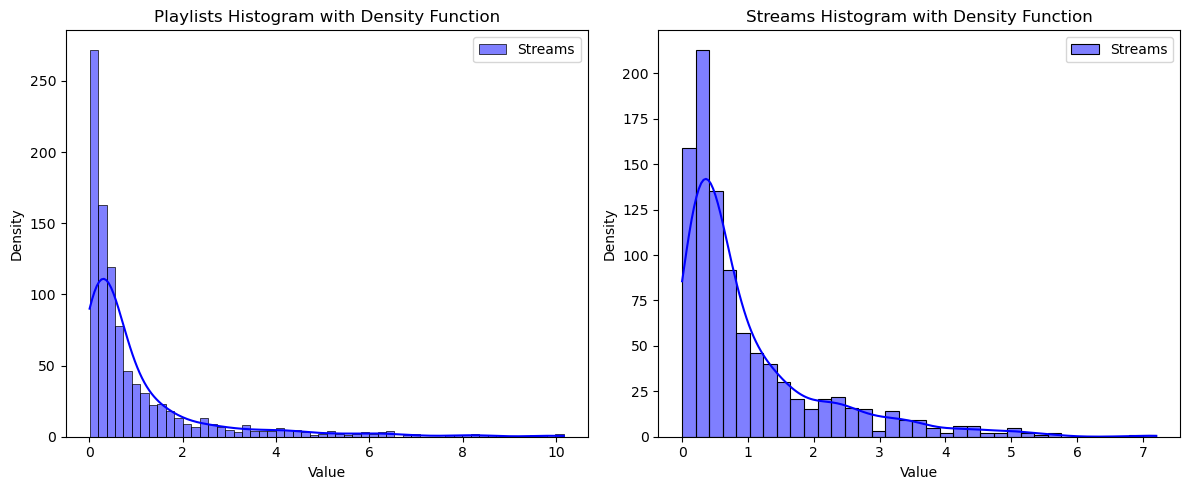

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(playlists, kde=True, color='b', label='Streams', ax=axes[0])

sns.histplot(streams, kde=True, color='b', label='Streams', ax=axes[1])
axes[1].set_title("Streams Histogram with Density Function")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].legend()

axes[0].set_title("Playlists Histogram with Density Function")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].legend()

plt.tight_layout()
plt.show()

In [10]:
stats.mannwhitneyu(x = streams, y = playlists)

MannwhitneyuResult(statistic=517495.0, pvalue=8.131337701437202e-08)

There is a huge difference in their distribution. We cannot use a Pearson's test to find the correlation. We will use Spearman Rank instead.

In [11]:
correlation, p_value = stats.spearmanr(playlists, streams)
print(f"Spearman correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.8319465614565277
P-value: 2.9091274952553442e-245


We conclude that there is a significant correlation.

In [12]:
streams_a = np.array(streams).reshape(-1, 1)
playlists_a = np.array(playlists).reshape(-1, 1)

In [13]:
reg = LinearRegression().fit(playlists_a, streams_a)
alpha = reg.intercept_
beta = reg.coef_
print("Intercept (alpha):", alpha)
print("Coefficients (beta):", beta)

Intercept (alpha): [0.4266273]
Coefficients (beta): [[0.5733727]]


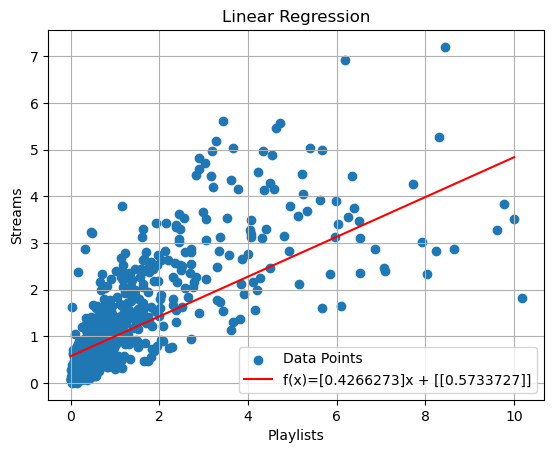

In [14]:
x = np.linspace(0, 10, playlists.shape[0])
y = alpha * x + beta

plt.scatter(playlists, streams, label='Data Points')
plt.plot(x, np.squeeze(y), color='red', label=f'f(x)={alpha}x + {beta}')


plt.xlabel('Playlists')
plt.ylabel('Streams')
plt.title('Linear Regression')
plt.grid(True)
plt.legend()
plt.show()